## Informasi Mahasiswa

Nama: Ivan Chiari

NPM : 2108107010027

## Jenis Dataset

Dataset dari kaggle https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset


informasi variabel
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

## Import Libary dan Baca dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
diabetes = pd.read_csv('dataset/diabetes.csv')
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Preprocessing Data

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [4]:
diabetes.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
print(diabetes.isnull().sum())

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


In [6]:
print(diabetes.duplicated().sum())

0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming diabetes['outcome'] is your target column
label_encoder = LabelEncoder()
diabetes['outcome'] = label_encoder.fit_transform(diabetes['outcome'])

In [8]:
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print(diabetes['outcome'].value_counts())

outcome
0    500
1    268
Name: count, dtype: int64


<Axes: >

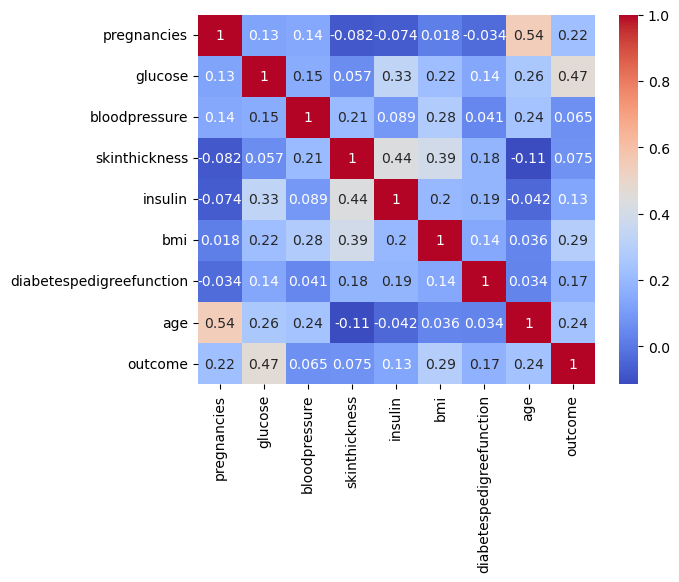

In [10]:
df_cor =diabetes.corr()
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

* Setiap fitur berkorelasi positif dengan fitur outcome kecuali ketebalan kulit, tekanan darah mempunyai korelasi sangat kecil hingga tidak penting.

* fitur Glukosa sangat berkorelasi positif, yang menyatakan fakta bahwa diabetes terjadi karena tingginya kadar gula darah dalam aliran darah yang tidak mampu diserap oleh sel secara efektif.

In [11]:
diabetes.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

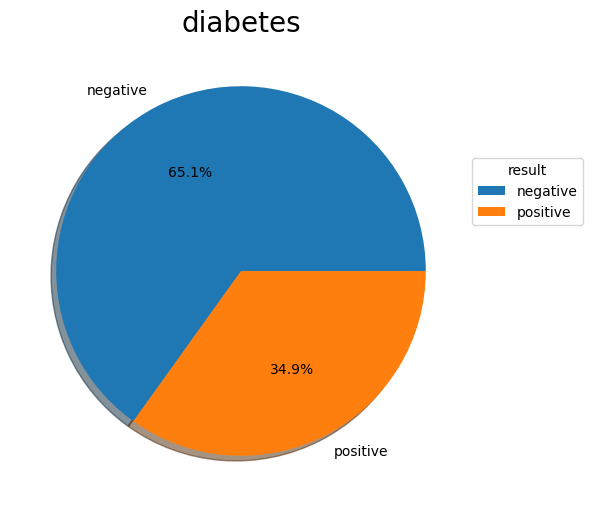

In [12]:
plt.figure(figsize=(8,6))

#input parameter
r=diabetes['outcome'].value_counts().values
label = ['negative','positive']

plt.pie(r,labels=label,shadow=True,autopct='%2.1f%%',explode=[0,0])

plt.legend(title='result',loc=(1,0.6))
plt.title('diabetes',fontsize=20)
plt.show()

* Di antara total populasi hampir 66,1 % telah didiagnosis negatif mengidap diabetes dan 34,9 % telah didiagnosis positif mengidap diabetes.
* Seperti yang terlihat di atas, kami menandai bahwa ini adalah kumpulan data yang seimbang tetapi tidak baik dan sedikit bias terhadap pasien non diabetes.

c:\Users\ahini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


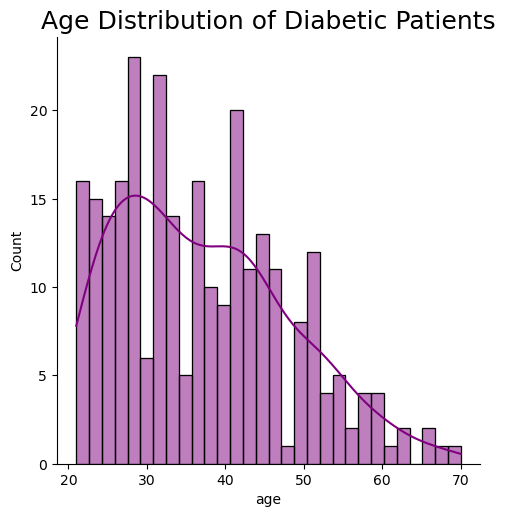

In [13]:

diabetic_age = diabetes[diabetes['outcome'] == 1]['age']
sns.displot(x=diabetic_age, color='purple', bins=30, kde=True)
plt.title('Age Distribution of Diabetic Patients', fontsize=18)
plt.show()

* dari grafik diatas dapat dilihat bahwa uisa paling banyak terkena diabetes pada rentang 20 - 45

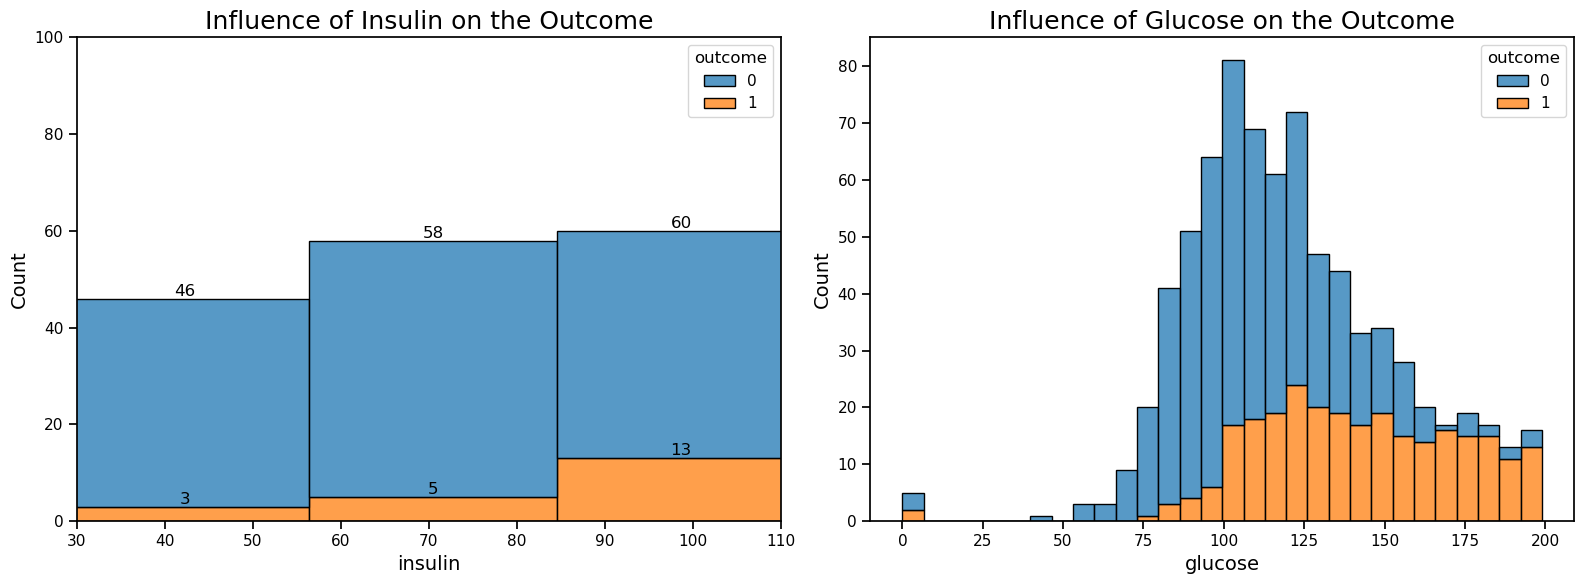

In [14]:
sns.set_context('notebook')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(x='insulin', data=diabetes, hue='outcome', ax=ax[0], bins=30, multiple="stack")
ax[0].set_title('Influence of Insulin on the Outcome', fontsize=18)
ax[0].set_xlabel('insulin', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_xlim([30, 110])  # Adjust according to your data
ax[0].set_ylim([0, 100])  # Adjust according to your data
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.histplot(x='glucose', data=diabetes, hue='outcome', bins=30, ax=ax[1], multiple="stack")
ax[1].set_title('Influence of Glucose on the Outcome', fontsize=18)
ax[1].set_xlabel('glucose', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


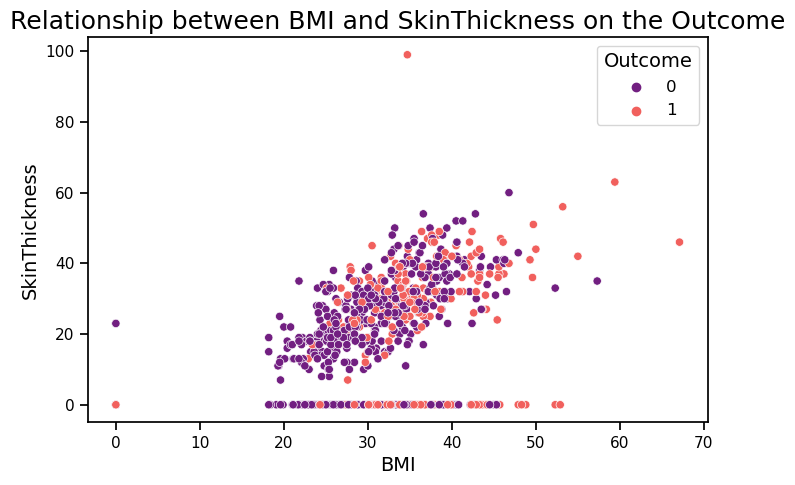

In [15]:
sns.set_context('notebook')
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='skinthickness', data=diabetes, hue='outcome', palette='magma')
plt.title('Relationship between BMI and SkinThickness on the Outcome', fontsize=18, loc='center')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('SkinThickness', fontsize=14)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')
plt.show()


Text(0.5, 1.0, 'Relationship between Pregnancies on the outcome')

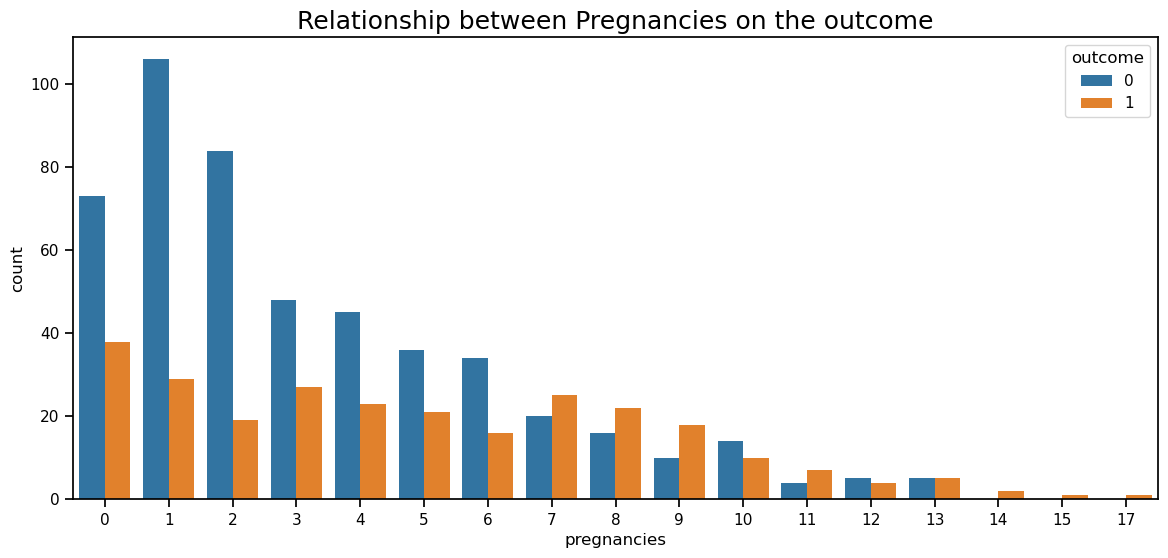

In [16]:
sns.set_context('notebook')
plt.figure(figsize=(14,6))
sns.countplot(x='pregnancies',hue='outcome',data=diabetes)
plt.title('Relationship between Pregnancies on the outcome',fontsize=18,  loc ='center' )

Dilihat dari plot, terlihat jelas bahwa seorang pasien dengan jumlah kegagalan kehamilan yang lebih tinggi telah didiagnosis positif mengidap diabetes.
Fakta: pasien diabetes mempunyai kemungkinan tinggi untuk mengalami keguguran.

## Split dataset dan normalisasi data

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# Select features and target variable
X = diabetes[['glucose', 'bmi', 'age', 'pregnancies',]]
y = diabetes['outcome']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
X

,glucose,bmi,age,pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0
...,...,...,...,...
763,101,32.9,63,10
764,122,36.8,27,2
765,121,26.2,30,5
766,126,30.1,47,1


## Membangun Model 

In [19]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a support vector classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(svc, classification_report(y_test, y_pred)))

Classification report for - 
SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154




In [20]:
# model training
svm_bmi = SVC( kernel='linear',random_state=10)
svm_bmi.fit(X_train[:, [0, 1]], y_train)

SVC(kernel='linear', random_state=10)

In [21]:
# model testing
y_pred_bmi =svm_bmi.predict(X_test[:, [0, 1]])
print("Classification Report:")
print(classification_report(y_test, y_pred_bmi))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [22]:
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X_train[:, [0, 1]], y_train)


SVC(C=10, gamma=1)

In [23]:
# Model testing and prediction
y_pred_rbf = svm_rbf.predict(X_test[:, [0, 1]])  
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



In [24]:
# model training
svm_glucose_age = SVC( kernel='linear',random_state=10)
svm_glucose_age.fit(X_train[:, [0, 2]], y_train)

SVC(kernel='linear', random_state=10)

In [25]:
# model testing
y_pred_age =svm_glucose_age.predict(X_test[:, [0, 2]])
print("Classification Report:")
print(classification_report(y_test, y_pred_age))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



## Visualisasi Model 

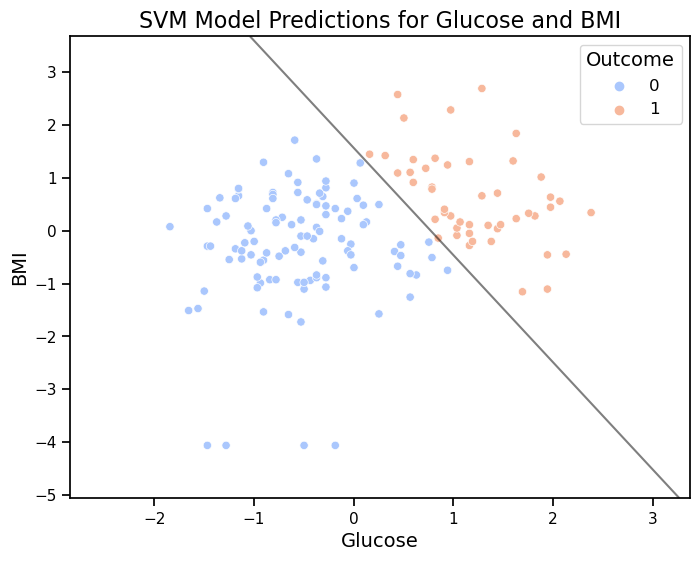

In [26]:
# Plot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_bmi, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('SVM Model Predictions for Glucose and BMI', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_bmi.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


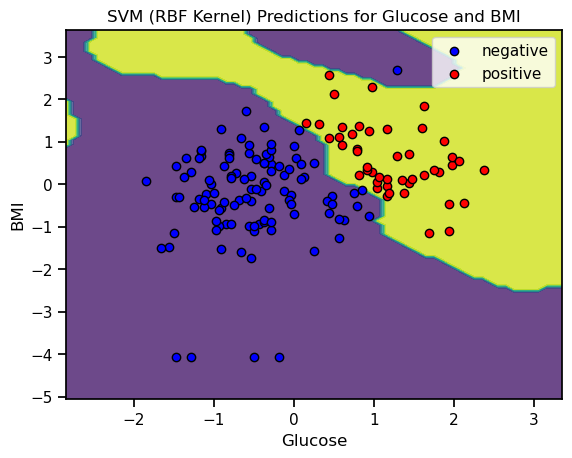

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the meshgrid range
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the scatter plot with specified labels
plt.scatter(X_test[y_pred_rbf == 0, 0], X_test[y_pred_rbf == 0, 1], c='blue', label='negative', edgecolors='k')
plt.scatter(X_test[y_pred_rbf == 1, 0], X_test[y_pred_rbf == 1, 1], c='red', label='positive', edgecolors='k')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('SVM (RBF Kernel) Predictions for Glucose and BMI')

# Add legend
plt.legend()

plt.show()


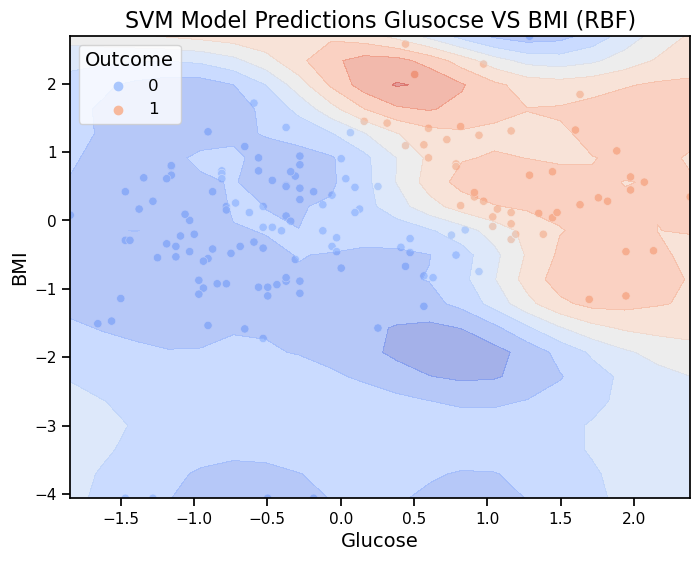

In [28]:
# Plotting the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_rbf, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('SVM Model Predictions Glusocse VS BMI (RBF)', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the hyperplane
x_points = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 20)
y_points = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 20)
X1, X2 = np.meshgrid(x_points, y_points)
Z = svm_rbf.decision_function(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, cmap='coolwarm', alpha=0.5) 
plt.show()


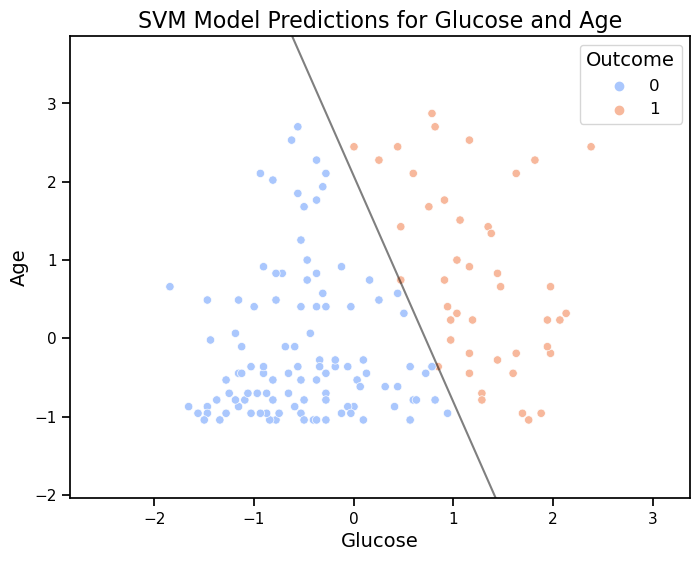

In [29]:
# Plot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 2], hue=y_pred_age, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('SVM Model Predictions for Glucose and Age', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 2].min() - 1, X_test[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_glucose_age.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()
